In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [143]:
train_data_hdb = pd.read_csv('./data/hdb_train.csv')
test_data_hdb = pd.read_csv('./data/hdb_test.csv')

In [144]:
train_data_hdb = train_data_hdb.drop(['index'],axis=1)
test_data_hdb = test_data_hdb.drop(['index'],axis=1)
print train_data_hdb.shape
print test_data_hdb.shape
print "List of Columns:\n", ", ".join(train_data_hdb.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_hdb.columns), "\n\n"



(759992, 14)
(3766, 13)
List of Columns:
block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, resale_price, storey_range, street_name, town, latitude, longitude, postal_code, floor 


List of Columns:
block, flat_model, flat_type, floor_area_sqm, lease_commence_date, month, storey_range, street_name, town, latitude, longitude, postal_code, floor 




In [145]:
#train_data_hdb.flat_type.value_counts()
#print train_data_hdb.iloc[25]
#print test_data_hdb.iloc[25]

In [146]:
#train_data_hdb['flat_type'] = train_data_hdb['flat_type'].astype('category')
#test_data_hdb['flat_type'] = test_data_hdb['flat_type'].astype('category')
#train_data_hdb['flat_model'] = train_data_hdb['flat_model'].astype('category')
#test_data_hdb['flat_model'] = test_data_hdb['flat_model'].astype('category')

#train_data_hdb['flat_type'] = train_data_hdb['flat_type'].cat.codes
#test_data_hdb['flat_type'] = test_data_hdb['flat_type'].cat.codes

#train_data_hdb['flat_model'] = train_data_hdb['flat_model'].cat.codes
#test_data_hdb['flat_model'] = test_data_hdb['flat_model'].cat.codes

#print train_data_hdb.head(10)
#print test_data_hdb.head(10)
#print train_data_hdb.iloc[25]
#print test_data_hdb.iloc[25]

In [147]:
#train_data_hdb.flat_model.value_counts()
t = train_data_hdb.flat_model.unique()
t.sort()
#t1 = test_data_hdb.flat_model.unique()
#t1.sort()
#print (train_data_hdb['flat_model'].astype('category').cat.codes).unique()
print t
flat_model_dict={}
for i in range(len(t)):
    flat_model_dict[t[i]] = i
print flat_model_dict

train_data_hdb['flat_model'] = train_data_hdb.flat_model.apply(lambda x : flat_model_dict[x])
#print train_data_hdb.flat_model.value_counts()
#print test_data_hdb.flat_model.value_counts()
#train_data_hdb.flat_model.unique().sort() == test_data_hdb.flat_model.unique().sort()

['2-ROOM' 'ADJOINED FLAT' 'APARTMENT' 'DBSS' 'IMPROVED'
 'IMPROVED-MAISONETTE' 'MAISONETTE' 'MODEL A' 'MODEL A-MAISONETTE'
 'MODEL A2' 'MULTI GENERATION' 'NEW GENERATION' 'PREMIUM APARTMENT'
 'PREMIUM APARTMENT LOFT' 'PREMIUM MAISONETTE' 'SIMPLIFIED' 'STANDARD'
 'TERRACE' 'TYPE S1' 'TYPE S2']
{'MAISONETTE': 6, 'MODEL A2': 9, 'APARTMENT': 2, 'IMPROVED': 4, 'IMPROVED-MAISONETTE': 5, 'MULTI GENERATION': 10, 'PREMIUM APARTMENT': 12, '2-ROOM': 0, 'TYPE S1': 18, 'NEW GENERATION': 11, 'STANDARD': 16, 'TYPE S2': 19, 'MODEL A': 7, 'MODEL A-MAISONETTE': 8, 'SIMPLIFIED': 15, 'TERRACE': 17, 'PREMIUM APARTMENT LOFT': 13, 'ADJOINED FLAT': 1, 'PREMIUM MAISONETTE': 14, 'DBSS': 3}


In [148]:
t = train_data_hdb.flat_type.unique()
t.sort()
print t
flat_type_dict={}
for i in range(len(t)):
    flat_type_dict[t[i]] = i
print flat_type_dict

train_data_hdb['flat_type'] = train_data_hdb.flat_type.apply(lambda x : flat_type_dict[x])

['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
{'3 ROOM': 2, '4 ROOM': 3, '1 ROOM': 0, 'MULTI GENERATION': 6, 'EXECUTIVE': 5, '5 ROOM': 4, '2 ROOM': 1}


In [149]:
t = train_data_hdb.block.unique()
t1 = test_data_hdb.block.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
block_dict={}
for i in range(len(t)):
    block_dict[t[i]] = i
#print block_dict

train_data_hdb['block'] = train_data_hdb.block.apply(lambda x : block_dict[x])
test_data_hdb['block'] = test_data_hdb.block.apply(lambda x : block_dict[x])


2190 1380
['1' '10' '100' ... '99A' '99B' '99C'] ['333' '308A' '577' ... '829' '398' '827']


In [150]:

train_data_hdb.month = train_data_hdb.month.apply(lambda x : int(x.replace("-","")))
print train_data_hdb.month.unique()

[199001 199002 199003 199004 199005 199006 199007 199008 199009 199010
 199011 199012 199101 199102 199103 199104 199105 199106 199107 199108
 199109 199110 199111 199112 199201 199202 199203 199204 199205 199206
 199207 199208 199209 199210 199211 199212 199301 199302 199303 199304
 199305 199306 199307 199308 199309 199310 199311 199312 199401 199402
 199403 199404 199405 199406 199407 199408 199409 199410 199411 199412
 199501 199502 199503 199504 199505 199506 199507 199508 199509 199510
 199511 199512 199601 199602 199603 199604 199605 199606 199607 199608
 199609 199610 199611 199612 199701 199702 199703 199704 199705 199706
 199707 199708 199709 199710 199711 199712 199801 199802 199803 199804
 199805 199806 199807 199808 199809 199810 199811 199812 199901 199902
 199903 199904 199905 199906 199907 199908 199909 199910 199911 199912
 200001 200002 200003 200004 200005 200006 200007 200008 200009 200010
 200011 200012 200101 200102 200103 200104 200105 200106 200107 200108
 20010

In [156]:

t = train_data_hdb.storey_range.unique()
t1 = test_data_hdb.storey_range.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
storey_dict={}
for i in range(len(t)):
    storey_dict[t[i]] = i
#print block_dict

train_data_hdb['storey_range'] = train_data_hdb.storey_range.apply(lambda x : storey_dict[x])
test_data_hdb['storey_range'] = test_data_hdb.storey_range.apply(lambda x : storey_dict[x])

25 15
['01 TO 03' '01 TO 05' '04 TO 06' '06 TO 10' '07 TO 09' '10 TO 12'
 '11 TO 15' '13 TO 15' '16 TO 18' '16 TO 20' '19 TO 21' '21 TO 25'
 '22 TO 24' '25 TO 27' '26 TO 30' '28 TO 30' '31 TO 33' '31 TO 35'
 '34 TO 36' '36 TO 40' '37 TO 39' '40 TO 42' '43 TO 45' '46 TO 48'
 '49 TO 51'] ['10 TO 12' '07 TO 09' '04 TO 06' '01 TO 03' '13 TO 15' '16 TO 18'
 '28 TO 30' '25 TO 27' '19 TO 21' '22 TO 24' '34 TO 36' '40 TO 42'
 '31 TO 33' '37 TO 39' '43 TO 45']


In [165]:
print train_data_hdb.town.unique()
print test_data_hdb.town.unique()

print train_data_hdb.street_name.unique()
print test_data_hdb.street_name.unique()

t = train_data_hdb.town.unique()
t1 = test_data_hdb.town.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
town_dict={}
for i in range(len(t)):
    town_dict[t[i]] = i
#print block_dict

train_data_hdb['town'] = train_data_hdb.town.apply(lambda x : town_dict[x])
test_data_hdb['town'] = test_data_hdb.town.apply(lambda x : town_dict[x])

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'BEDOK STH AVE 1'
 'NEW UPP CHANGI RD' 'BEDOK NTH AVE 4' 'BEDOK NTH RD' 'BEDOK STH AVE 3'
 '

In [167]:
t = train_data_hdb.street_name.unique()
t1 = test_data_hdb.street_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
street_name_dict={}
for i in range(len(t)):
    street_name_dict[t[i]] = i
#print block_dict

train_data_hdb['street_name'] = train_data_hdb.street_name.apply(lambda x : street_name_dict[x])
test_data_hdb['street_name'] = test_data_hdb.street_name.apply(lambda x : street_name_dict[x])

542 462
['ADMIRALTY DR' 'ADMIRALTY LINK' 'AH HOOD RD' 'ALEXANDRA RD'
 'ALJUNIED CRES' 'ALJUNIED RD' 'ANCHORVALE DR' 'ANCHORVALE LANE'
 'ANCHORVALE LINK' 'ANCHORVALE RD' 'ANG MO KIO AVE 1' 'ANG MO KIO AVE 10'
 'ANG MO KIO AVE 2' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 9' 'ANG MO KIO ST 11' 'ANG MO KIO ST 21'
 'ANG MO KIO ST 31' 'ANG MO KIO ST 32' 'ANG MO KIO ST 52' 'BAIN ST'
 'BALAM RD' 'BANGKIT RD' 'BEACH RD' 'BEDOK CTRL' 'BEDOK NTH AVE 1'
 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 4' 'BEDOK NTH RD'
 'BEDOK NTH ST 1' 'BEDOK NTH ST 2' 'BEDOK NTH ST 3' 'BEDOK NTH ST 4'
 'BEDOK RESERVOIR RD' 'BEDOK RESERVOIR VIEW' 'BEDOK STH AVE 1'
 'BEDOK STH AVE 2' 'BEDOK STH AVE 3' 'BEDOK STH RD' 'BENDEMEER RD'
 'BEO CRES' 'BISHAN ST 11' 'BISHAN ST 12' 'BISHAN ST 13' 'BISHAN ST 22'
 'BISHAN ST 23' 'BISHAN ST 24' 'BOON KENG RD' 'BOON LAY AVE' 'BOON LAY DR'
 'BOON LAY PL' 'BOON TIONG RD' 'BRIGHT HILL DR' 'BT BATOK CTRL'
 'B

In [157]:
train_data_hdb.floor.value_counts()

5     194143
8     177498
2     156862
11    147820
14     46014
17     16621
20      8231
23      5238
3       2700
26      2050
13      1259
29       749
18       265
35       141
32       139
38       135
41        61
28        39
47        11
44         9
50         5
33         2
Name: floor, dtype: int64

In [158]:
train_data_hdb['resale_price'].describe()

count    7.599920e+05
mean     2.814338e+05
std      1.414466e+05
min      5.000000e+03
25%      1.750000e+05
50%      2.630000e+05
75%      3.680000e+05
max      1.180000e+06
Name: resale_price, dtype: float64


 mu = 281433.84 and sigma = 141446.49



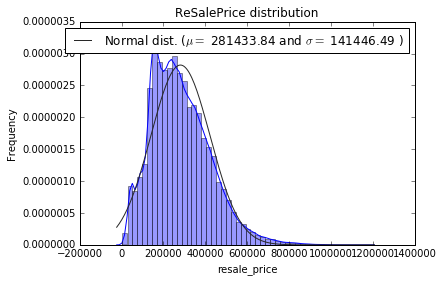

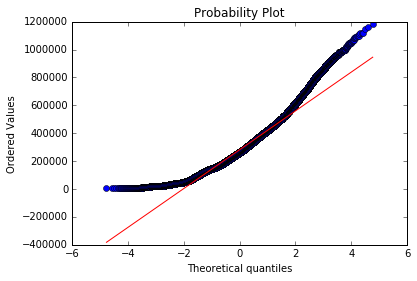

Skewness: 0.767258
Kurtosis: 0.859022


In [159]:
sns.distplot(train_data_hdb['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_hdb['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_hdb['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_hdb['resale_price'].skew())
print("Kurtosis: %f" % train_data_hdb['resale_price'].kurt())

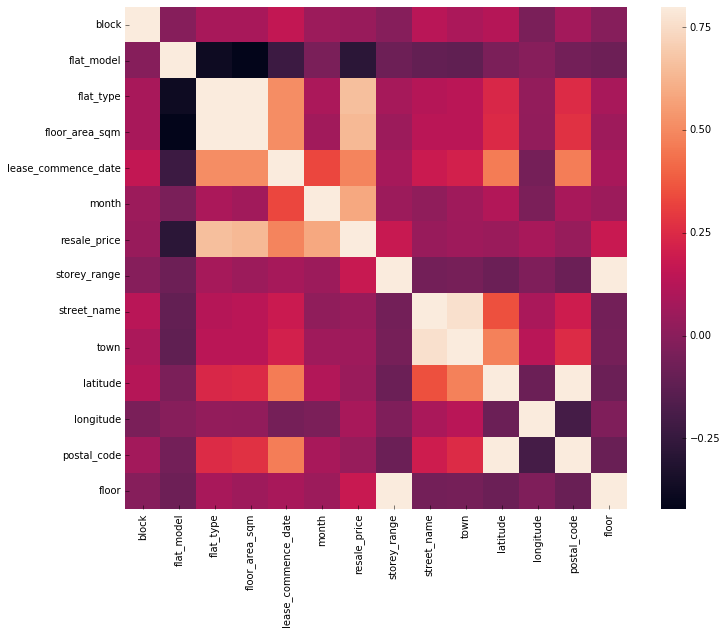

In [168]:
corrmat = train_data_hdb.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [169]:
corrmat

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
block,1.000000,-0.008016,0.084062,0.087822,0.162972,0.054802,0.042319,-0.009234,0.133726,0.095981,0.122793,-0.044055,0.070261,-0.009947
flat_model,-0.008016,1.000000,-0.377076,-0.421953,-0.228885,-0.044705,-0.282291,-0.081235,-0.109941,-0.119540,-0.039064,-0.002098,-0.059858,-0.082023
flat_type,0.084062,-0.377076,1.000000,0.953179,0.511587,0.096811,0.657249,0.082733,0.125997,0.140879,0.239038,0.029956,0.251480,0.086606
floor_area_sqm,0.087822,-0.421953,0.953179,1.000000,0.509776,0.066854,0.642275,0.052990,0.138652,0.138892,0.249394,0.024121,0.271805,0.056078
lease_commence_date,0.162972,-0.228885,0.511587,0.509776,1.000000,0.331335,0.486772,0.081707,0.185970,0.217141,0.465356,-0.054653,0.466385,0.085611
month,0.054802,-0.044705,0.096811,0.066854,0.331335,1.000000,0.585803,0.050998,0.019122,0.061712,0.114469,-0.038302,0.088642,0.054908
resale_price,0.042319,-0.282291,0.657249,0.642275,0.486772,0.585803,1.000000,0.176265,0.044387,0.058944,0.048011,0.088065,0.039325,0.183010
storey_range,-0.009234,-0.081235,0.082733,0.052990,0.081707,0.050998,0.176265,1.000000,-0.060242,-0.053900,-0.083557,-0.026485,-0.086407,0.993738
street_name,0.133726,-0.109941,0.125997,0.138652,0.185970,0.019122,0.044387,-0.060242,1.000000,0.766181,0.351949,0.093473,0.198500,-0.061165
town,0.095981,-0.119540,0.140879,0.138892,0.217141,0.061712,0.058944,-0.053900,0.766181,1.000000,0.478070,0.134036,0.252328,-0.054757


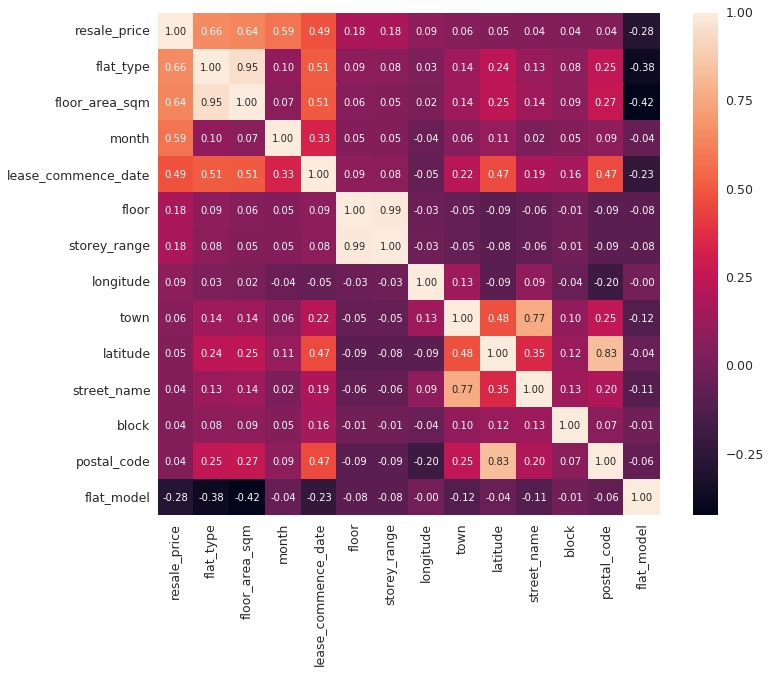

In [174]:
cols = corrmat.nlargest(14, 'resale_price')['resale_price'].index
cm = np.corrcoef(train_data_hdb[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [175]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,resale_price
1,flat_type
2,floor_area_sqm
3,month
4,lease_commence_date
5,floor
6,storey_range
7,longitude
8,town
9,latitude


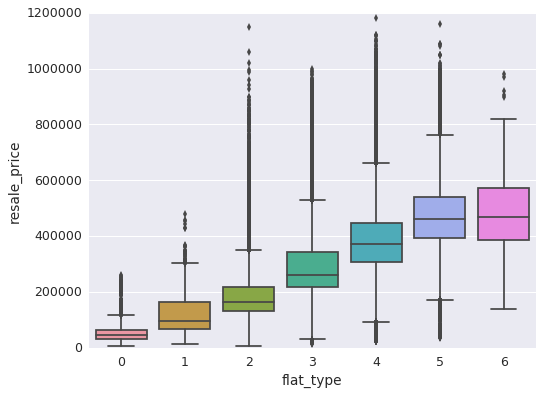

In [176]:
var = 'flat_type'
data = pd.concat([train_data_hdb['resale_price'], train_data_hdb[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
fig.axis(ymin=0, ymax=1200000);
plt.show()

In [177]:
sns.jointplot(x=train_data_hdb['flat_type'], y=train_data_hdb['resale_price'], kind='reg')

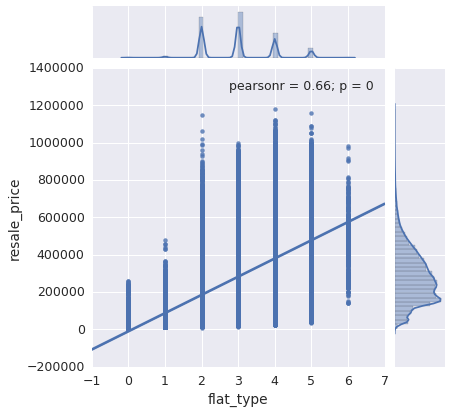

In [178]:
plt.show()

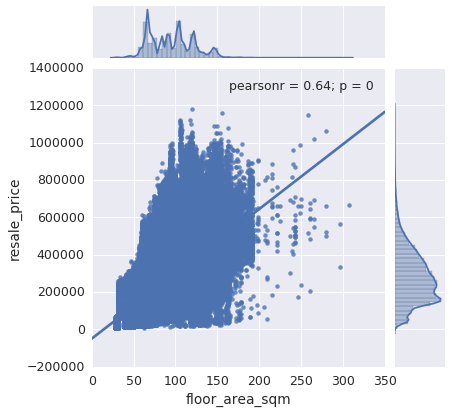

In [179]:
sns.jointplot(x=train_data_hdb['floor_area_sqm'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

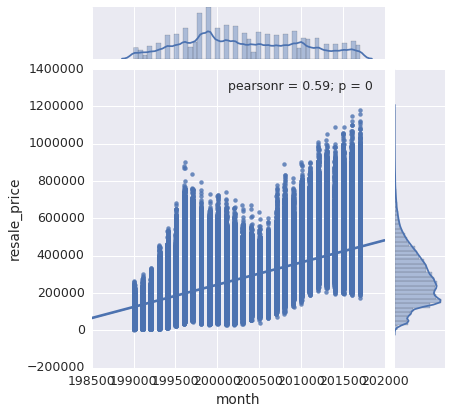

In [180]:
sns.jointplot(x=train_data_hdb['month'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

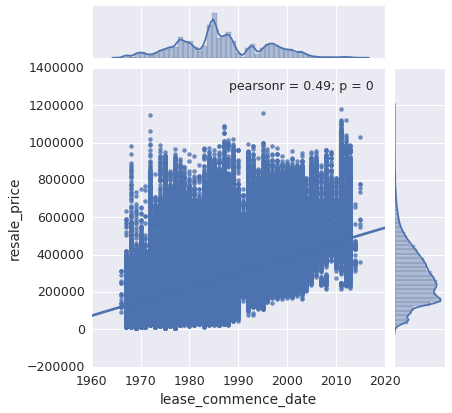

In [181]:
sns.jointplot(x=train_data_hdb['lease_commence_date'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

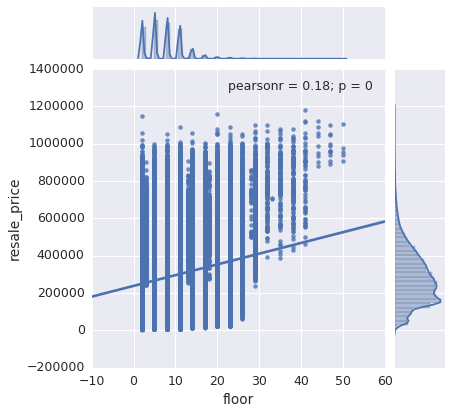

In [182]:
sns.jointplot(x=train_data_hdb['floor'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

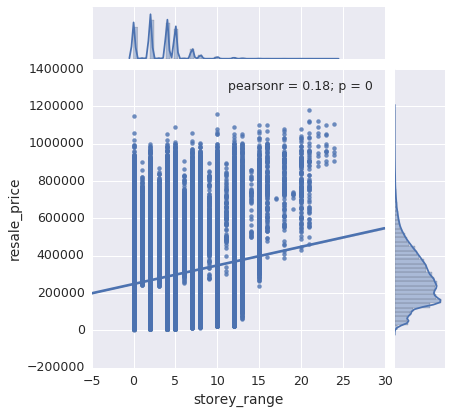

In [183]:
sns.jointplot(x=train_data_hdb['storey_range'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

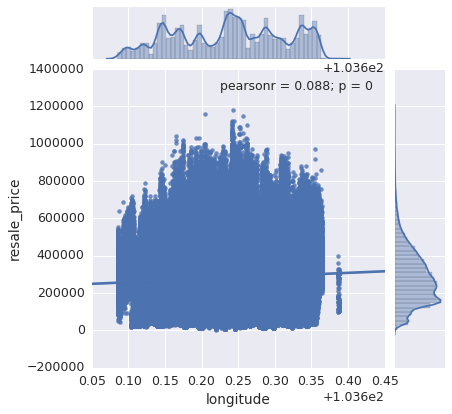

In [184]:
sns.jointplot(x=train_data_hdb['longitude'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

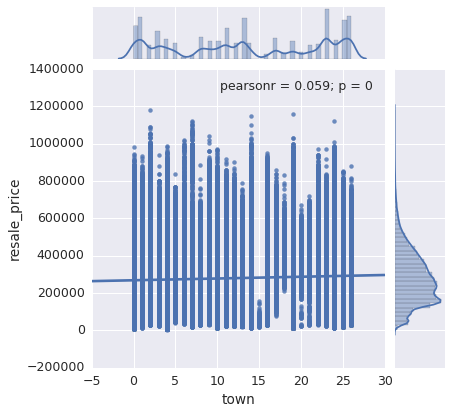

In [185]:
sns.jointplot(x=train_data_hdb['town'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

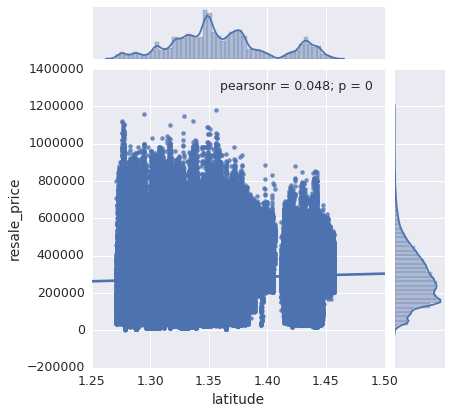

In [186]:
sns.jointplot(x=train_data_hdb['latitude'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

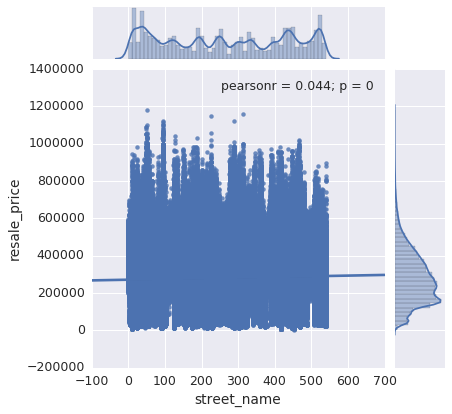

In [187]:
sns.jointplot(x=train_data_hdb['street_name'], y=train_data_hdb['resale_price'], kind='reg')
plt.show()

In [192]:
y = train_data_hdb.resale_price.unique()
y.sort()
y
train_data_hdb[train_data_hdb['resale_price'] == 5000]

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,resale_price,storey_range,street_name,town,latitude,longitude,postal_code,floor
6590,1729,4,0,31.0,1975,199007,5000.0,0,452,4,1.278361,103.819384,90007,2


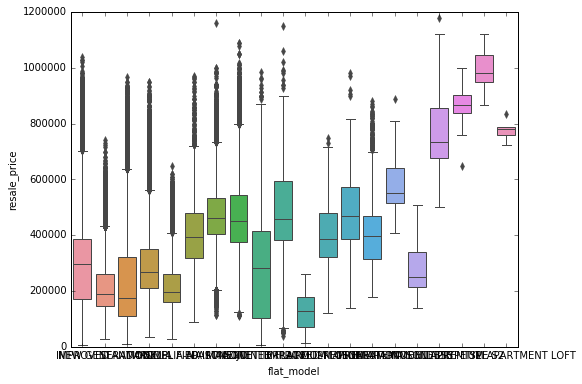

In [14]:
var = 'flat_model'
data = pd.concat([train_data_hdb['resale_price'], train_data_hdb[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
fig.axis(ymin=0, ymax=1200000);
plt.show()

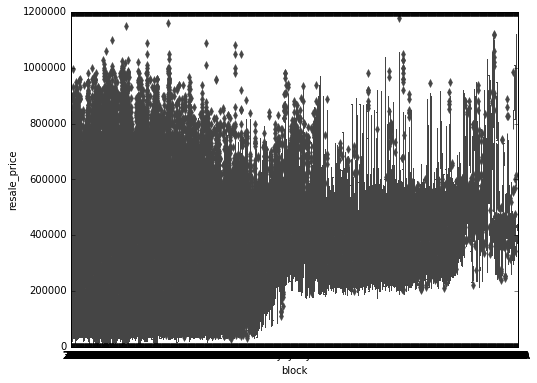

In [15]:
var = 'block'
data = pd.concat([train_data_hdb['resale_price'], train_data_hdb[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
fig.axis(ymin=0, ymax=1200000);
plt.show()

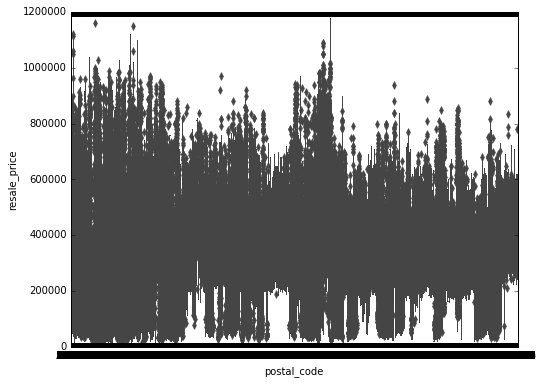

In [16]:
var = 'postal_code'
data = pd.concat([train_data_hdb['resale_price'], train_data_hdb[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="resale_price", data=data)
fig.axis(ymin=0, ymax=1200000);
plt.show()